In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson
import altair as alt
import scipy.stats as stats

alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [2]:
seoulBike = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

seoulBike['Date'] = pd.to_datetime(seoulBike['Date'], format='%d/%m/%Y')
seoulBike['Weekday'] = seoulBike['Date'].dt.day_name()
seoulBike['Weekday'] = pd.Categorical(seoulBike['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

seoulBike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [3]:
seoulBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
seoulBike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Weekday                      0
dtype: int64

In [9]:
seoulBike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
# 这里画一个violin plot

In [11]:
X = seoulBike.loc[:, seoulBike.columns != "Rented Bike Count"]
X.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday
0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [12]:
X.tail()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday
8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8759,2018-11-30,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [13]:
X.columns.tolist()

['Date',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Weekday']

In [14]:
y = seoulBike["Rented Bike Count"]
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

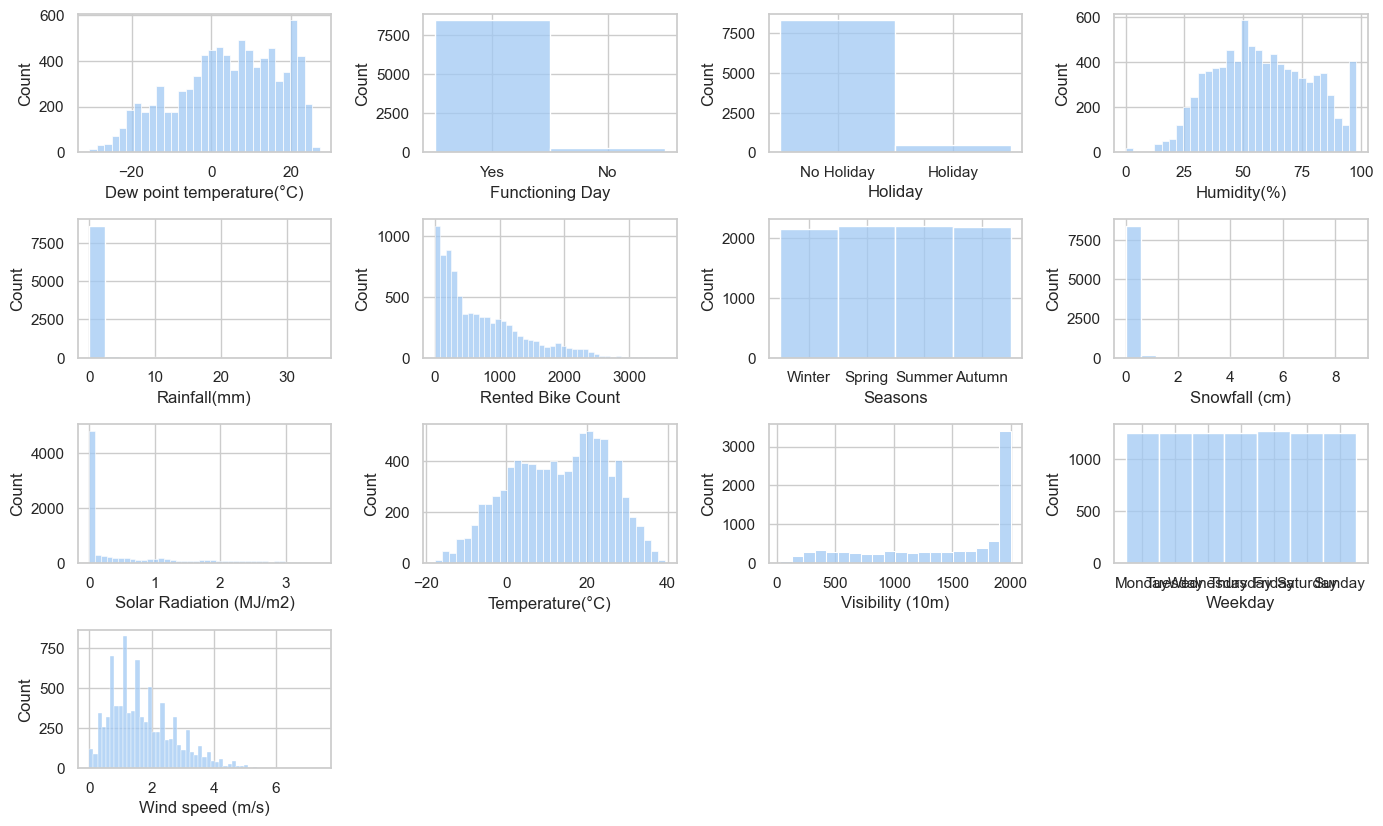

In [15]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 10))

#variables = X.columns.difference(['Date', 'Seasons',"Hour"])
variables = seoulBike.columns.difference(['Date', "Hour"])
for i, var in enumerate(variables):
    plt.subplot(5, 4, i + 1)  
    sns.histplot(seoulBike[var])  

plt.tight_layout()  
plt.show() 

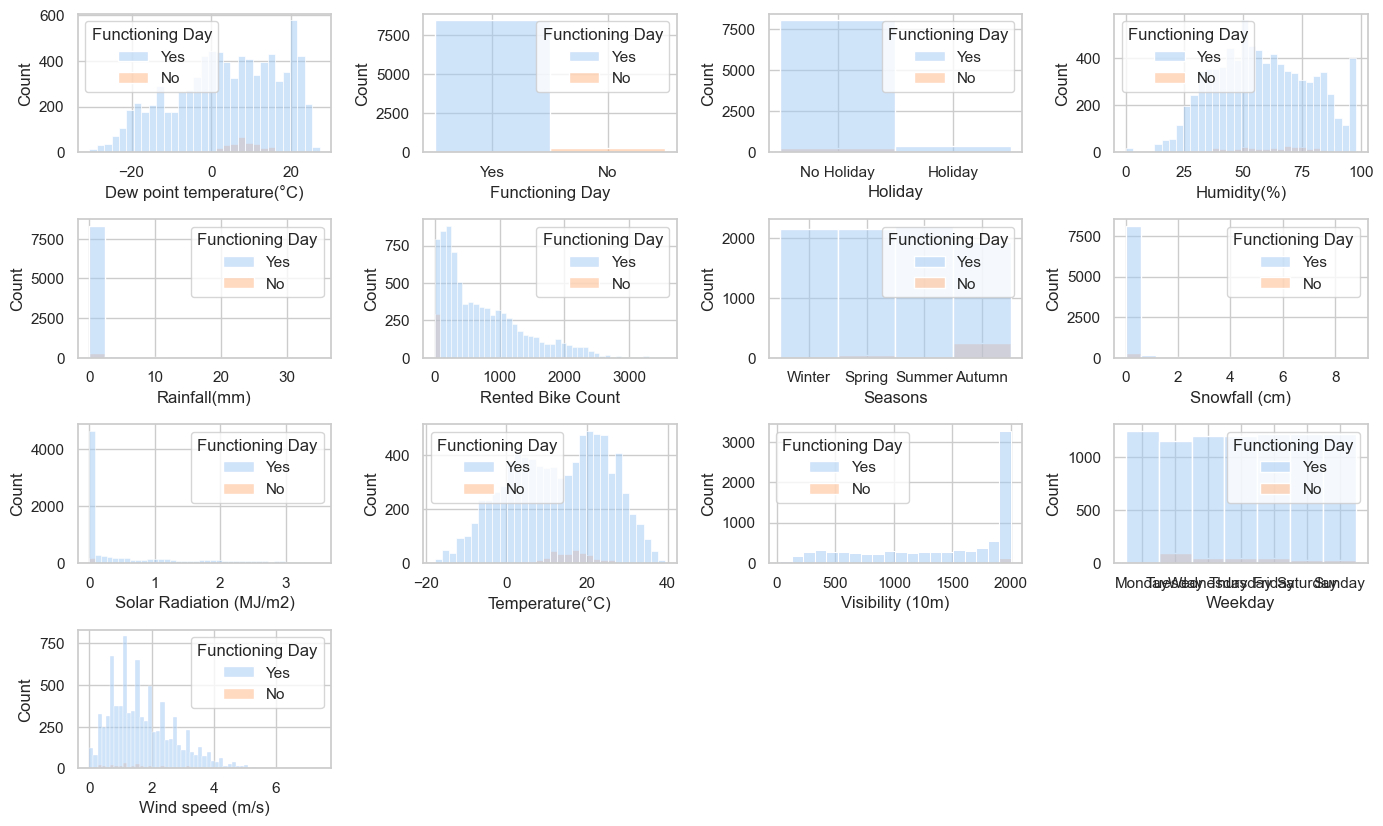

In [16]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 10))

variables = seoulBike.columns.difference(['Date', "Hour"])
for i, var in enumerate(variables):
    plt.subplot(5, 4, i + 1)  
    sns.histplot(data=seoulBike, x=var, hue='Functioning Day')  

plt.tight_layout()  
plt.show()  


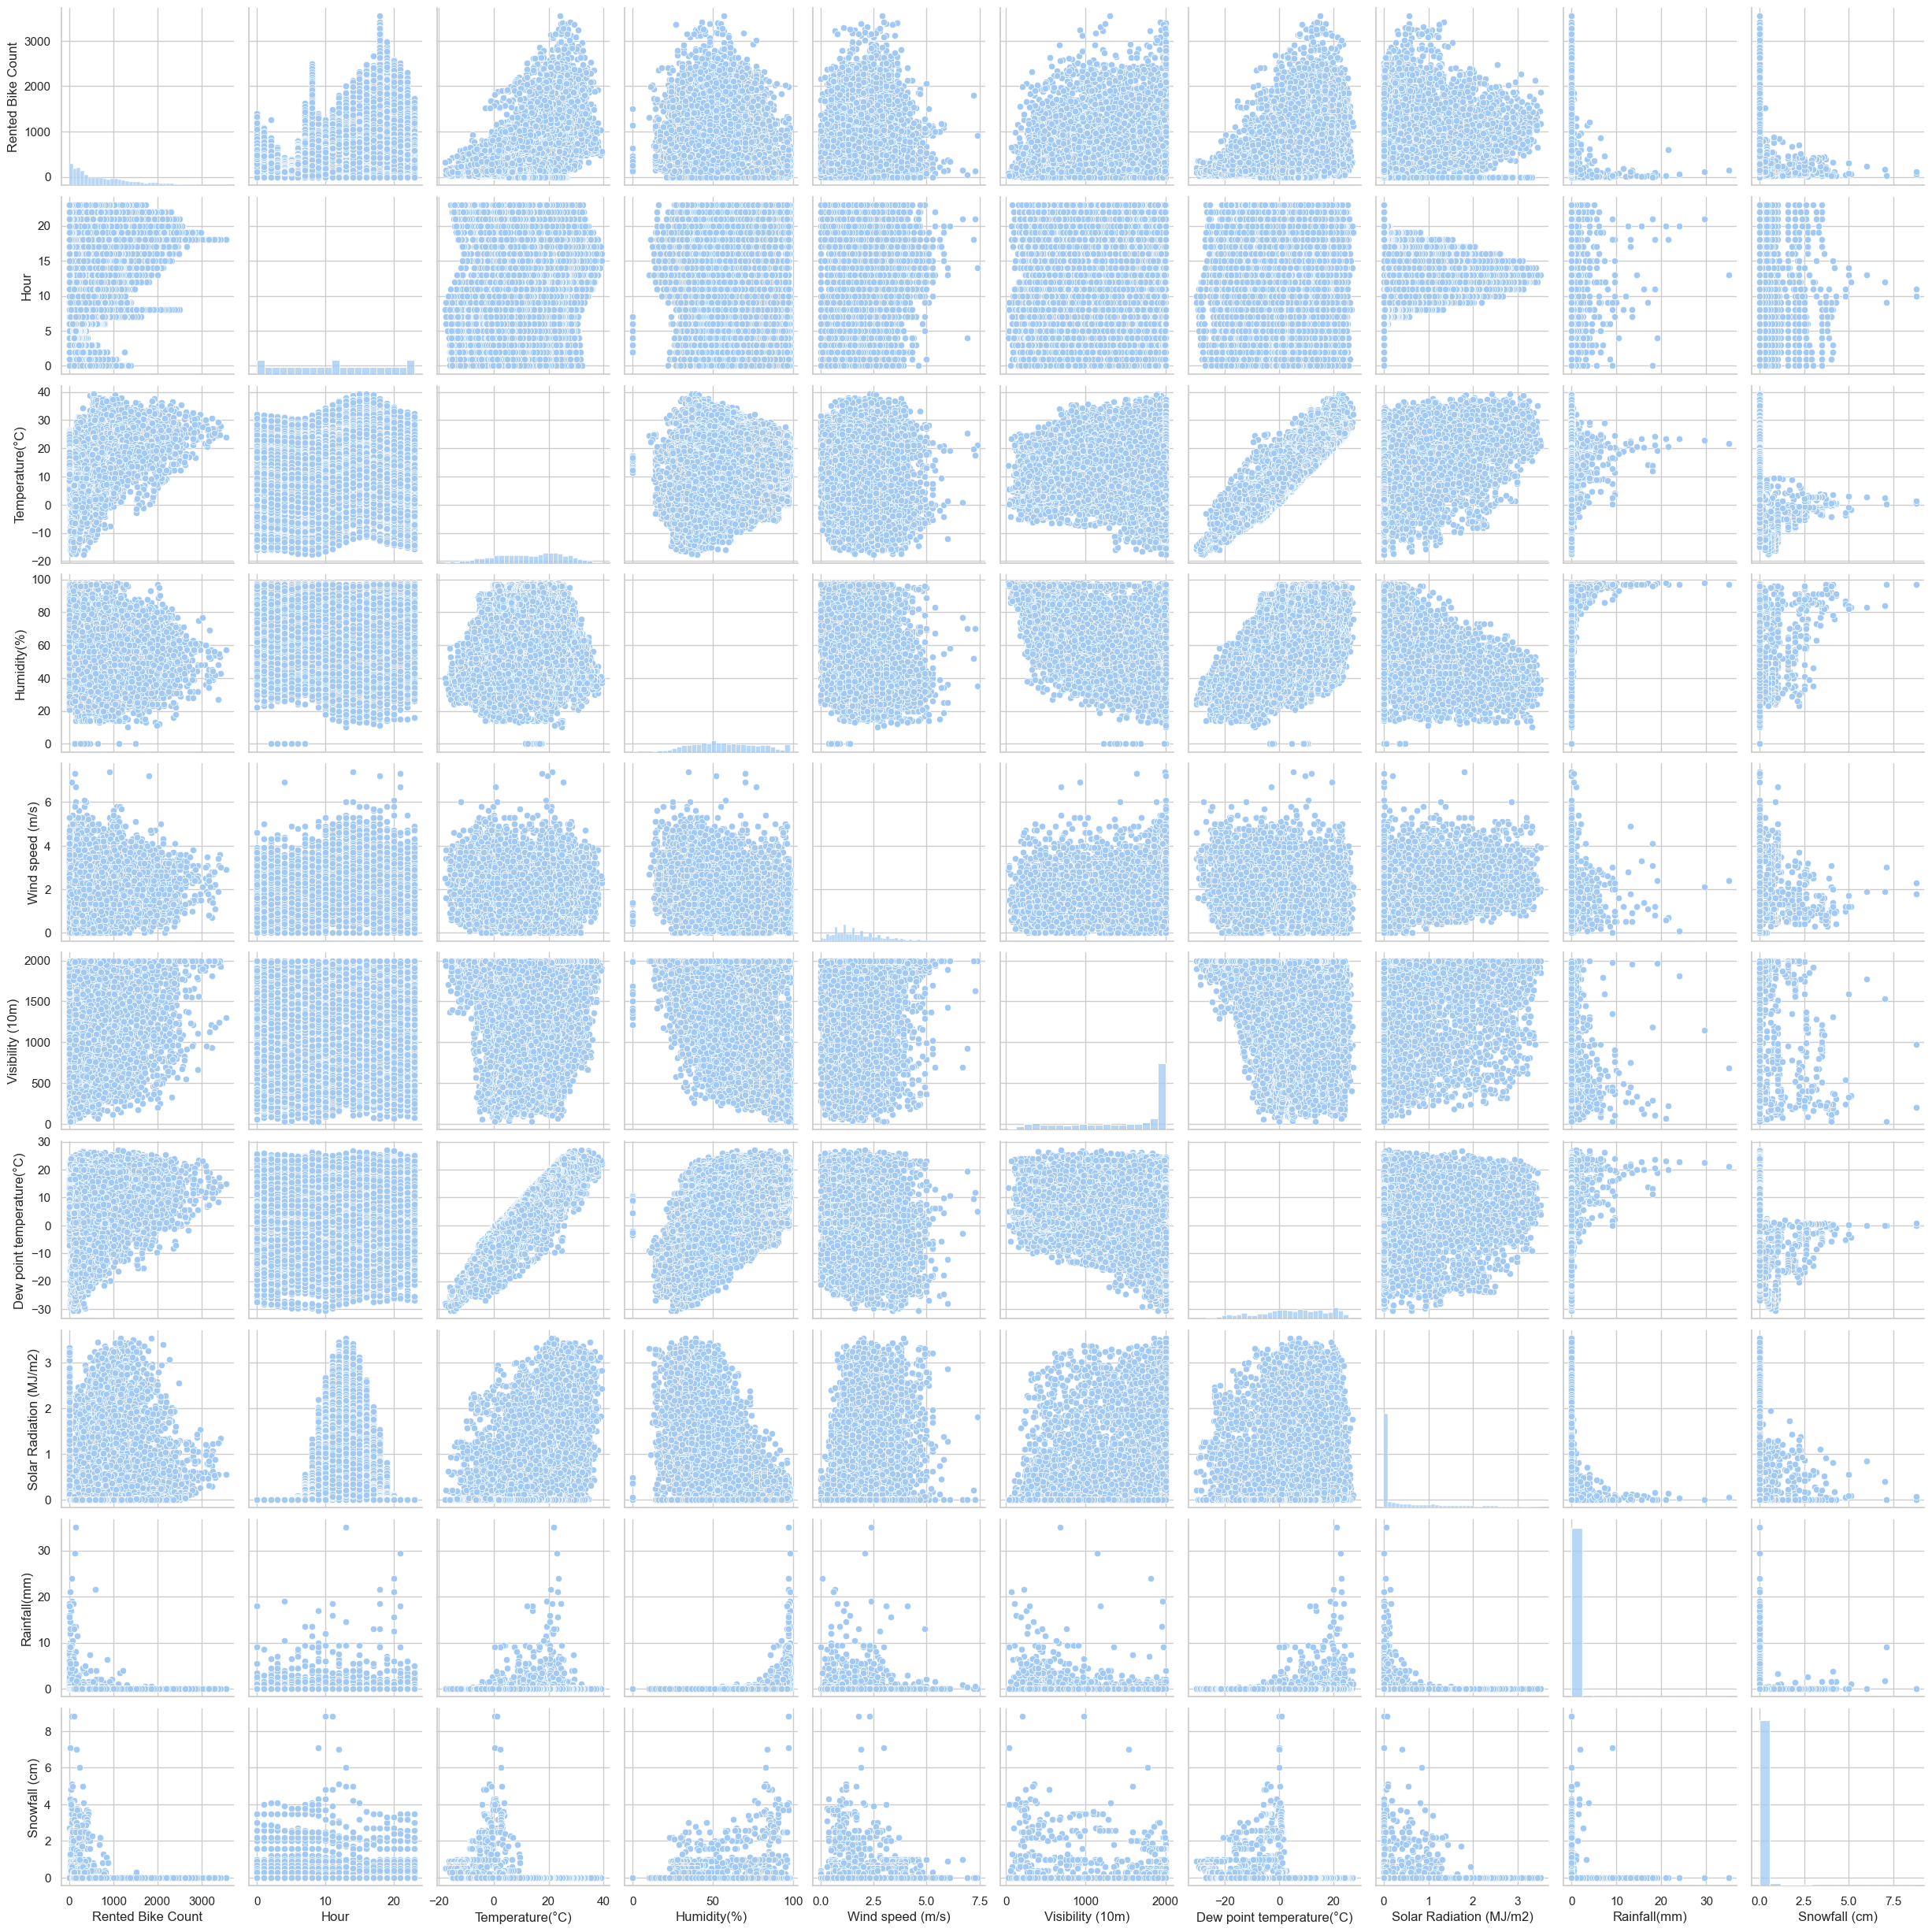

In [18]:
sns.pairplot(seoulBike)
plt.show()

In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = seoulBike.drop(labels = ["Function"], axis = 1)
data_vif['Intercept'] = 1
data_vif
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]

KeyError: "['Function'] not found in axis"

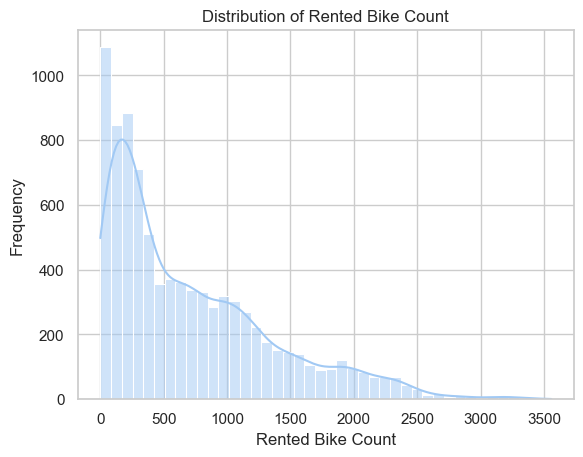

In [20]:
sns.histplot(y, kde = True) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()


In [58]:
# 年考虑太大了

In [21]:
import numpy as np
from scipy import stats

# 假设seoulBike['Rented Bike Count']是你的数据
data = seoulBike['Rented Bike Count']

# 使用numpy计算样本平均，作为Poisson分布的lambda参数
lambda_est = np.mean(data)

# 也可以使用scipy.stats的描述统计功能来计算平均值
lambda_est_stats = stats.describe(data).mean

print("Estimated lambda using numpy:", lambda_est)
print("Estimated lambda using scipy.stats:", lambda_est_stats)


Estimated lambda using numpy: 704.6020547945205
Estimated lambda using scipy.stats: 704.6020547945205


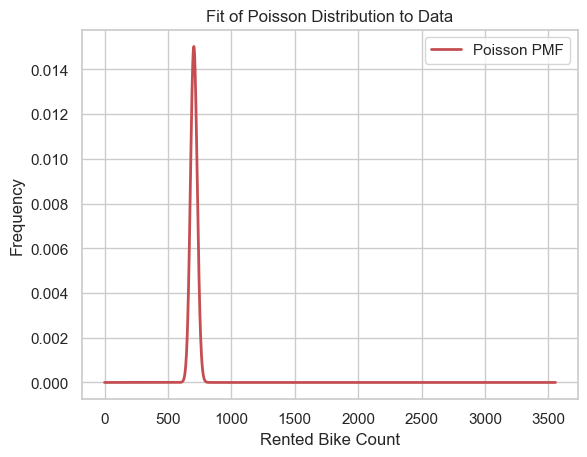

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 假设data是你的样本数据
data = seoulBike['Rented Bike Count']

# 计算样本的平均值，作为泊松分布的λ
lambda_est = np.mean(data)

# 生成泊松分布的PMF对应的概率值
# 注意：我们使用整数数组作为PMF的x值，这些x值覆盖了你的数据范围
poisson_pmf = stats.poisson.pmf(np.arange(data.min(), data.max()+1), lambda_est)

# 绘制实际数据的直方图
#plt.hist(data, alpha=0.6, color='g', label='Actual Data')

# 绘制泊松分布的PMF
plt.plot(np.arange(data.min(), data.max()+1), poisson_pmf, 'r-', lw=2, label='Poisson PMF')

plt.title('Fit of Poisson Distribution to Data')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [23]:
print(y.mean(),y.var())

704.6020547945205 416021.7333900025


In [24]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y, 'norm')
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow normal distribution")
else:
    print("y follows normal distribution")

Kolmogorov-Smirnov statistic: 0.9657217534157011
p-value: 0.0
y does not follow normal distribution


In [25]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y, 'poisson', args=(np.mean(y),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 0.5588529934657052
p-value: 0.0
y does not follow poisson distribution


In [26]:
# 可能可以参考的model: negative binomial regression, 或者inverse gaussian distribution

# EDA

## 加一个week day转换 

In [27]:
aggregation_date = {
    'Rented Bike Count': 'mean',
    #'Hour': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "first",
    'Seasons': 'first',
    'Holiday': 'first',
    "Weekday": "first"
}

day_bike = seoulBike.groupby('Date').agg(aggregation_date)
day_bike.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons,Holiday,Weekday
Date,,,,,,,,,,,,,
2017-12-01,397.458333,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,Yes,Winter,No Holiday,Friday
2017-12-02,355.125000,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,Yes,Winter,No Holiday,Saturday
2017-12-03,300.916667,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,Yes,Winter,No Holiday,Sunday
2017-12-04,363.708333,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,Yes,Winter,No Holiday,Monday
2017-12-05,346.125000,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,Yes,Winter,No Holiday,Tuesday


Text(0.5, 1.0, 'Count of Functioning Day')

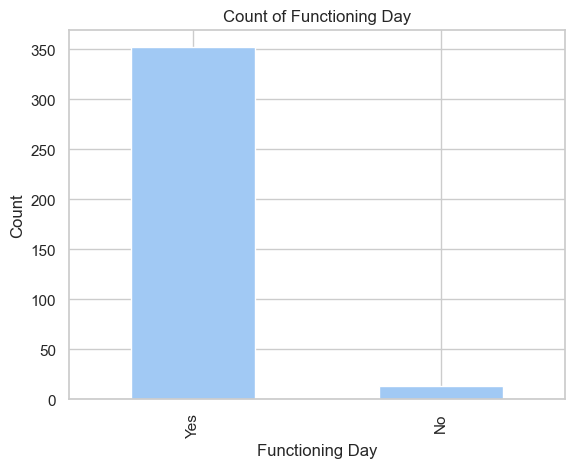

In [28]:
functioning_day_count = day_bike['Functioning Day'].value_counts()
functioning_day_count.plot(kind='bar')

plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.title('Count of Functioning Day')

In [29]:
day_bike_sorted

NameError: name 'day_bike_sorted' is not defined

In [30]:
day_bike_sorted = day_bike.sort_values('Weekday')
chart_season = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Seasons"),
    alt.Y("count()"),
    color="Functioning Day",
    #size=alt.Size(value=100)  
).properties(
    width = 250,
)

chart_holiday = alt.Chart(day_bike_sorted).mark_bar().encode(
    alt.X("Holiday"),
    alt.Y("count()"),
    color="Functioning Day",
    size=alt.Size(value=100)  
).properties(
    width = 250,
)

chart_weekday = alt.Chart(day_bike_sorted).mark_line().encode(
    alt.X("Weekday",sort=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
    alt.Y("count()"),
    color="Functioning Day",
    #size=alt.Size(value=100)  
).properties(
    width = 250,
)
chart_season | chart_weekday | chart_holiday

alt.HConcatChart(...)

No function day集中出现在春秋。

In [32]:
chart_holiday = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Functioning Day"),
    alt.Y("count()"),
    color="Holiday",
    size=alt.Size(value=80)  
).properties(
    width = 400,
)
chart_holiday

alt.Chart(...)

no functionday几乎全部出现在no holiday

In [33]:
hours_bike = seoulBike.groupby(["Hour","Holiday"]).mean().reset_index()
hours_bike.head()

,Hour,Holiday,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,Holiday,466.166667,8.777778,63.500000,1.283333,1451.444444,1.738889,0.0,0.122222,0.055556
1,0,No Holiday,545.365994,11.416427,65.074928,1.462536,1432.443804,4.688473,0.0,0.146398,0.061960
2,1,Holiday,393.333333,8.416667,64.111111,1.333333,1481.388889,1.555556,0.0,0.000000,0.077778
3,1,No Holiday,427.887608,11.053314,66.233429,1.281556,1411.360231,4.622190,0.0,0.065418,0.073487
4,2,Holiday,303.888889,8.094444,65.222222,1.350000,1470.055556,1.455556,0.0,0.000000,0.111111


In [34]:
hour_plot_1 = alt.Chart(hours_bike).mark_bar().encode(
    alt.X("Hour"),
    alt.Y("Rented Bike Count"),
    color = "Holiday"
)
hour_plot_2 = alt.Chart(hours_bike).mark_line().encode(
    alt.X("Hour"),
    alt.Y("Rented Bike Count"),
    color = "Holiday"
)
hour_plot_1 | hour_plot_2 

alt.HConcatChart(...)

共享单车的使用高峰集中在早晚高峰期，其他情况下no holiday的单车需求与holiday虽然也较多，但相差不大。

In [35]:
hours_season_bike = seoulBike.groupby(["Hour","Seasons"]).mean().reset_index()
hours_season_bike.head()

,Hour,Seasons,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,Autumn,623.681319,12.629670,65.065934,1.245055,1622.032967,5.931868,0.0,0.221978,0.036264
1,0,Spring,470.630435,11.064130,66.478261,1.528261,1188.184783,4.355435,0.0,0.218478,0.000000
2,0,Summer,899.065217,24.752174,72.336957,1.389130,1522.978261,19.085870,0.0,0.125000,0.000000
3,0,Winter,165.177778,-3.610000,55.911111,1.654444,1401.688889,-11.535556,0.0,0.013333,0.213333
4,1,Autumn,485.714286,12.212088,66.384615,1.115385,1610.637363,5.821978,0.0,0.010989,0.035165


In [36]:
hour_season_plot_1 = alt.Chart(hours_season_bike).mark_bar().encode(
    alt.X("Hour"),
    alt.Y("Rented Bike Count"),
    color = "Seasons"
)
hour_season_plot_2 = alt.Chart(hours_season_bike).mark_line().encode(
    alt.X("Hour"),
    alt.Y("Rented Bike Count"),
    color = "Seasons"
)
hour_season_plot_1 | hour_season_plot_2 

alt.HConcatChart(...)

温度较高的季节共享单车需求更大。因此可以初步推断气温高的时间，早晚高峰（6-10，16-20）点之间需要大量车辆。

# SMOTE Resampling

In [37]:
# 原始版本
bike = seoulBike.drop(["Functioning Day","Date","Hour","Rented Bike Count"], axis = 1)
bike["Holiday"] = bike["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
bike = pd.get_dummies(bike, columns=['Seasons'])
bike.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,Friday,0,0,0,1
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,Friday,0,0,0,1
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,Friday,0,0,0,1
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,Friday,0,0,0,1
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,Friday,0,0,0,1


In [41]:
# group by days 版本
bike_days = day_bike.reset_index().drop(["Date","Rented Bike Count","Functioning Day"], axis = 1)
bike_days["Holiday"] = bike["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})

bike_days= pd.get_dummies(bike_days, columns=['Seasons'])
bike_days= pd.get_dummies(bike_days, columns=['Weekday'])

bike_days.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday_Monday,Weekday_Tuesday,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday
0,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,0,0,0,0,1,0,0,0,0,1,0,0
1,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,1,0
2,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,0,0,0,0,1,0,0,0,0,0,0,1
3,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,0,0,0,0,1,1,0,0,0,0,0,0
4,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,0,0,0,0,1,0,1,0,0,0,0,0


In [42]:
# Since the original data is unbalanced, use smote to resample the data
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#X_resampled, y_resampled = smote.fit_resample(bike, seoulBike['Functioning Day'])
X_resampled, y_resampled = smote.fit_resample(bike_days, day_bike.reset_index()['Functioning Day'])
print(y_resampled[y_resampled == "Yes"].count(),y_resampled[y_resampled == "No"].count())

352 352


# Split Train and Test

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standardized the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_resampled, test_size = 0.2, random_state = 0)

In [44]:
print(X_train.shape[0], len(y_train))
print(X_test.shape[0],len(y_test))

print(X_train_std.shape[0], len(y_train))
print(X_test_std.shape[0],len(y_test))

563 563
141 141
563 563
141 141


# Classification

## Parameter: SVM

In [50]:
# SVM analysis with standardlized

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_std, y_train_std)

y_pred = svm_model.predict(X_test_std)

accuracy = accuracy_score(y_test_std, y_pred)
print(f'Accuracy of SVM model: {accuracy}')

print(svm_model.score(X_train_std,y_train_std))
print(svm_model.score(X_test_std,y_test_std))
report = metrics.classification_report(y_test_std, svm_model.predict(X_test_std))
print(report)


Accuracy of SVM model: 0.950354609929078
0.9698046181172292
0.950354609929078
              precision    recall  f1-score   support

          No       0.96      0.95      0.95        74
         Yes       0.94      0.96      0.95        67

    accuracy                           0.95       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.95      0.95      0.95       141



In [46]:
#hyperparamaters adjusting
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_std, y_train_std)

print("Best SVM hyperparameters:", grid_search.best_params_)
print("Best SVM accuracy on testing set:", grid_search.score(X_test_std, y_test_std), "And the accuracy on training set is: ",
      grid_search.score(X_train_std, y_train_std))

Best SVM hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best SVM accuracy on testing set: 0.9574468085106383 And the accuracy on training set is:  0.9751332149200711


In [49]:
# adjusted SVM model

from sklearn.metrics import accuracy_score, confusion_matrix
svm_model = SVC(kernel='poly', C=1, gamma = "scale", random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM model: {accuracy}')

train_accuracy = svm_model.score(X_train,y_train)
test_accuracy = svm_model.score(X_test,y_test)
print(f"SVM training score is {train_accuracy}, test score is {test_accuracy}")

prediction = svm_model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print("SVM's confusion matirx is:")
print(confusionmatrix)


report = metrics.classification_report(y_test, svm_model.predict(X_test))
print(report)

print(f"The AUC score for SVM is {accuracy_score(y_test,prediction)}")

Accuracy of SVM model: 0.6099290780141844
SVM training score is 0.5754884547069272, test score is 0.6099290780141844
SVM's confusion matirx is:
[[49 25]
 [30 37]]
              precision    recall  f1-score   support

          No       0.62      0.66      0.64        74
         Yes       0.60      0.55      0.57        67

    accuracy                           0.61       141
   macro avg       0.61      0.61      0.61       141
weighted avg       0.61      0.61      0.61       141

The AUC score for SVM is 0.6099290780141844


## Non pararmter: Random Forest

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# setup a random forest model and 

rf_model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)
rf_model.fit(X_train, y_train)

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")


Random Forest training score is 0.9413854351687388, test score is 0.9361702127659575
Random Forest's confusion matirx is:
[[74  0]
 [ 9 58]]
The AUC score for Random forest is 0.9361702127659575


In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7,10],
    'min_samples_leaf': [1, 2, 3, 4]
}

#  since our dataset is small, use cv = 5 to reduce overfitting
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [54]:
# adjusted Random Forest Model
#rf_model=RandomForestClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split =7, max_depth = None ,random_state=42)
#rf_model=RandomForestClassifier(n_estimators=50,min_samples_leaf=1,min_samples_split =2, max_depth = None ,random_state=42)
rf_model=RandomForestClassifier(n_estimators=50,min_samples_leaf=1,min_samples_split =5, max_depth = None ,random_state=42)
rf_model.fit(X_train, y_train)

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")

Random Forest training score is 0.9982238010657194, test score is 0.9645390070921985
Random Forest's confusion matirx is:
[[73  1]
 [ 4 63]]
The AUC score for Random forest is 0.9645390070921985


In [55]:
report = metrics.classification_report(y_test, rf_model.predict(X_test))
print("Classification metrics for Random Forest model:")
print(report)

Classification metrics for Random Forest model:
              precision    recall  f1-score   support

          No       0.95      0.99      0.97        74
         Yes       0.98      0.94      0.96        67

    accuracy                           0.96       141
   macro avg       0.97      0.96      0.96       141
weighted avg       0.97      0.96      0.96       141



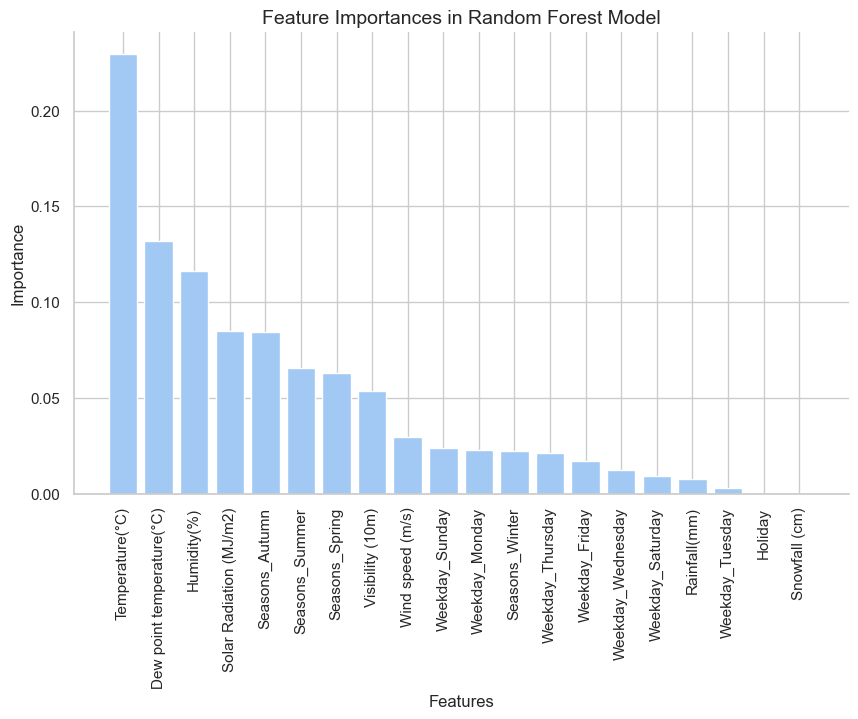

In [56]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_names

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model", fontsize = 14)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## Regression

In [86]:
FunctionBike = seoulBike[seoulBike["Functioning Day"] == "Yes"]
FunctionBike = FunctionBike.drop(columns="Functioning Day", axis=1)
FunctionBike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Friday


In [88]:
FunctionBike_X = FunctionBike.drop(columns=["Rented Bike Count","Date"], axis=1)
FunctionBike_X["Holiday"] = FunctionBike_X["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
FunctionBike_X = pd.get_dummies(FunctionBike_X, columns=['Weekday',"Seasons"])
FunctionBike_X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Weekday_Tuesday,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0


In [108]:
FunctionBike_y = FunctionBike["Rented Bike Count"]
FunctionBike_y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8465, dtype: int64

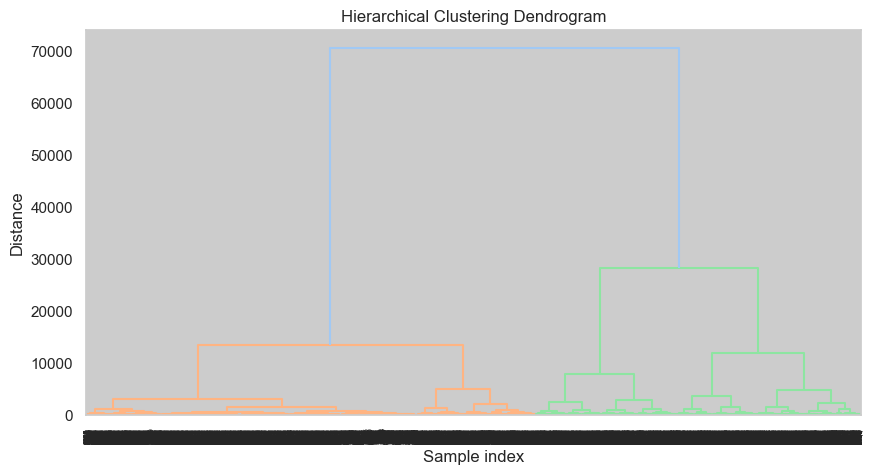

In [90]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 使用 linkage 函数进行层次聚类
Z = linkage(FunctionBike_X, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [93]:
Z

array([[3.77000000e+02, 1.38500000e+03, 7.33757453e-01, 2.00000000e+00],
       [5.59000000e+03, 6.09400000e+03, 7.54983444e-01, 2.00000000e+00],
       [5.78300000e+03, 6.11900000e+03, 9.94987437e-01, 2.00000000e+00],
       ...,
       [1.69200000e+04, 1.69230000e+04, 1.33842230e+04, 4.90900000e+03],
       [1.69240000e+04, 1.69250000e+04, 2.82833381e+04, 3.55600000e+03],
       [1.69260000e+04, 1.69270000e+04, 7.06075736e+04, 8.46500000e+03]])

In [101]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#threshold = 50  # 设定阈值
num_clusters = 2  # 或者指定聚类数

# 获取聚类结果
#clusters = fcluster(Z, threshold, criterion='distance')  # 或者使用 num_clusters 参数
clusters = fcluster(Z, num_clusters, criterion='maxclust')  # 或者使用 num_clusters 参数

# 将聚类结果添加到原始数据中
FunctionBike_X['Cluster'] = clusters

# # 打印每个样本的聚类标签
# print(FunctionBike_X.head())
FunctionBike_X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Weekday_Wednesday,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1


In [115]:
bike_reg = pd.concat([FunctionBike_X, FunctionBike_y], axis=1)
bike_reg

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Weekday_Thursday,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,1,712


In [122]:
bike_reg.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday',
       'Weekday_Thursday', 'Weekday_Friday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Cluster', 'Rented Bike Count'],
      dtype='object')

In [121]:
data_functioning_melt=pd.melt(data_functioning, value_vars=['Holiday', "Seasons"], 
                              id_vars=data_functioning.loc[ : , "Temperature":"Snowfall"].columns.tolist()+['Count'], 
                              var_name='Variable')

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Weekday_Saturday,Weekday_Sunday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Cluster,Rented Bike Count,Variable,value


# 这是目前cluster不太好的结果

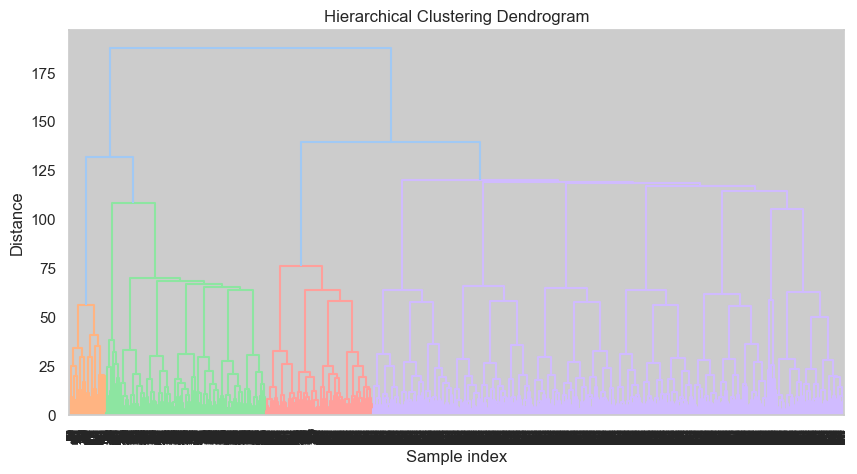

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(FunctionBike_X)

Z2 = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


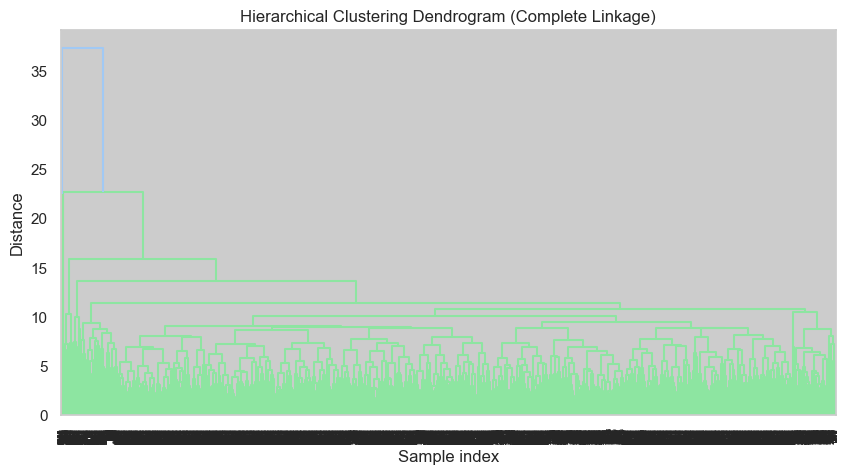

In [92]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 使用 linkage 函数进行层次聚类，将 Ward 替换为 Complete 方法
Z2 = linkage(scaled_data, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z2)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# 后面要用的部分

In [ ]:
seoulBike[seoulBike["Functioning Day"] == "No"]

In [ ]:
seoulBike[seoulBike["Functioning Day"] == "No"]["Date"]#.dt.days

In [ ]:
# season可以去掉，可替代性太强了

In [ ]:
# 什么情况下一定不function
# 按照date合并日平均（不考虑hour、season）
# 用bootstrap扩充数据
# classification: 判断function or not

In [ ]:
# 如果function，根据这些变量预测需要投放多少车辆

In [ ]:
# time series: 判断用车高峰期需要准备的车的数量（考虑实际情况，也可能会用其他的模型，如netrual）

In [ ]:
seoulBike['Date'] = pd.to_datetime(seoulBike['Date'])
seoulBike["Date"].max()

In [ ]:
# EDA 需求：
# 查看data之间的关系： pairs, heatmap
# data 的Description版本


In [ ]:
seoulBike.groupby(["Date"]).mean()

In [ ]:
# 在不同的sesaon里面function day 出现的频次：stack histogram
# 对季节的rented bike的density plot


In [ ]:
# PCA查看重要性